<a href="https://colab.research.google.com/github/AdamayB/Tensorflow_Zero_to_Mastery/blob/main/01_Regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network using TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Create data

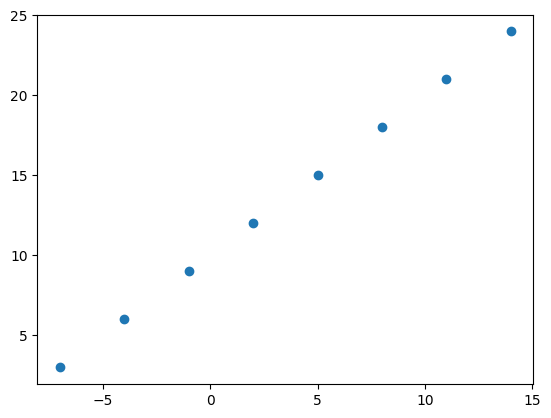

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]);

# Visualize
plt.scatter(X,y);

# Input and Output shape

In [3]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [4]:
# Turn NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model
2. Compiling model- define loss function and optimizer and evaluation matrix
3. Fitting the model



In [5]:
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 753ms/step - loss: 8.4833 - mae: 8.4833
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.3508 - mae: 8.3508
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 8.2183 - mae: 8.2183
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 8.0858 - mae: 8.0858
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 7.9533 - mae: 7.9533


In [6]:
# Trying to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 111ms/step


array([[27.392056]], dtype=float32)

In [7]:
y_pred=model.predict([99.0])

1/1 [==============================] - 0s 44ms/step


In [8]:
y_pred

array([[159.27727]], dtype=float32)

In [9]:
y_pred+7.9409

array([[167.21817]], dtype=float32)

## Improving model
Improving by altering steps while creating model

1. **Creating Model:** Increase number of dense layers and change activation method
2. **Compiling Model:** change optimization function and change learning rate of the optimization function
3. **Fitting Model:**Increase number of epochs or provide more data


In [10]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 351ms/step - loss: 9.3267 - mae: 9.3267
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1942 - mae: 9.1942
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0617 - mae: 9.0617
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9292 - mae: 8.9292
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7967 - mae: 8.7967
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6642 - mae: 8.6642
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5317 - mae: 8.5317
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3992 - mae: 8.3992
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2667 - mae: 8.2667
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1342 - mae: 8.1342
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - lo

In [11]:
y_pred=model.predict([9.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[16.243946]], dtype=float32)

In [12]:
# Making more adjustments
# adding extra layer
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 474ms/step - loss: 14.2512 - mae: 14.2512
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4956 - mae: 13.4956
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7528 - mae: 12.7528
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0041 - mae: 12.0041
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2473 - mae: 11.2473
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4866 - mae: 10.4866
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7211 - mae: 9.7211
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9270 - mae: 8.9270
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0935 - mae: 8.0935
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2208 - mae: 7.2208
Epoch 11/100
1/1 [==============================] - 0s 1

In [13]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 80ms/step


array([[31.111338]], dtype=float32)

## Common ways to improve a deep model(Go Step By Step):
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change Learning rate(Most important hyperparamter to change)
* Fitting on more data
* Fittin longer

In [14]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 961ms/step - loss: 12.0025 - mae: 12.0025
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8974 - mae: 11.8974
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7921 - mae: 11.7921
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 11.6867 - mae: 11.6867
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 11.5812 - mae: 11.5812
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 11.4756 - mae: 11.4756
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 11.3698 - mae: 11.3698
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 11.2638 - mae: 11.2638
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 11.1577 - mae: 11.1577
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 11.0514 - mae: 11.0514
Epoch 11/100
1/1 [==============================

In [15]:
y_pred=model.predict([11.])
y_pred

1/1 [==============================] - 0s 162ms/step


array([[20.824976]], dtype=float32)

## Evaluating Model

Typical workflow when building a neural network

`Build a model -> fit it-> evaluate it ->tweak the model-> fit it-> evaluate it ->tweak the model-> fit it-> evaluate it ->tweak the model....`


When evaluating a model, there are 3 words that one must know:
>"Visualize, Visualize and Visualize"

It is a good idea to visualize:
* The data- what data are we working with? What does it look like?
* The model itself- what does our model look like?
* The training of model- how does a model perform while it learns?
* The predictions of the model- how do the predictions of the model line up/ how correct are the predictions?


In [16]:
# Making bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

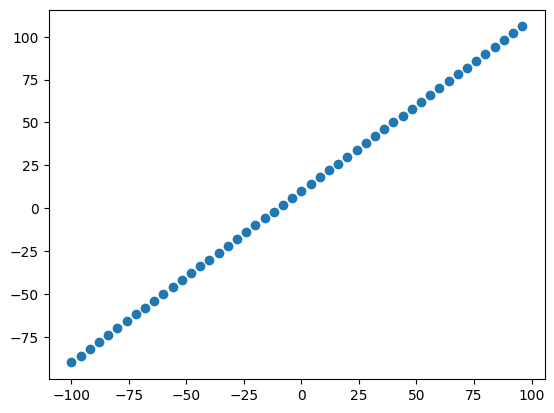

In [18]:
# Visualize data
plt.scatter(X,y)

## The 3 sets...
* Training Set
* Validation Set
* Test Set

In [19]:
# Length of Samples
len(X)

50

In [52]:
# Split data
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Visualise training and testing data

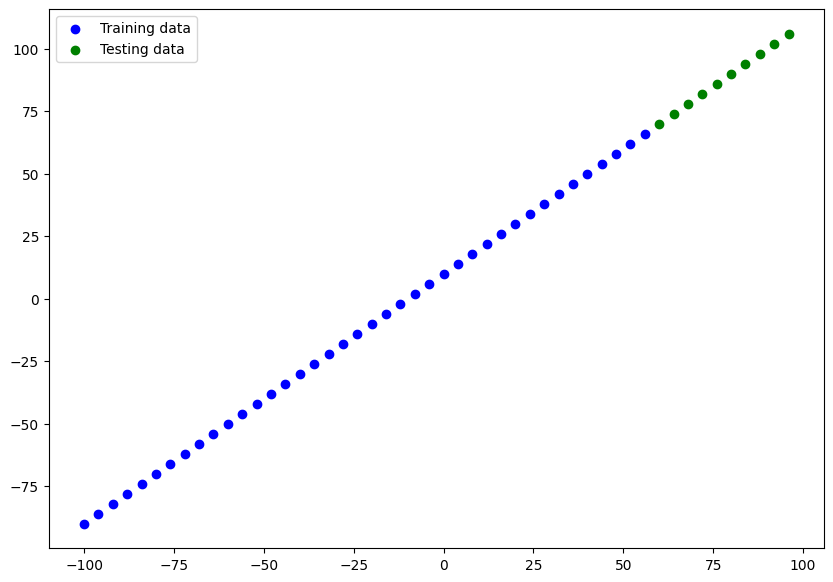

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [22]:
# Building Neural network

#1. Create a model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

In [23]:
# Create a model which builds automatically by defining the input_shape argument
#1. Create a model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Adam(lr=0.01),
              metrics=["mae"])

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params: total number of params in model.
* Trainable params: params(patterns) the model can update as it trains.
* Non-trainable params: these parameters aren't updated during training (this is typical when you bring already learnt patterns or parameters from other models during **transfer learning**)

In [25]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Create a model which builds automatically by defining the input_shape argument
#1. Create a model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Adam(lr=0.001),
              metrics=["mae"])

In [41]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 82.8735 - mae: 82.8735
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 11.4983 - mae: 11.4983
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 29.5809 - mae: 29.5809
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 13.9697 - mae: 13.9697
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 15.5020 - mae: 15.5020
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2985 - mae: 12.2985
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.5827 - mae: 11.5827
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2416 - mae: 11.2416
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 42.2862 - mae: 42.2862
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 29.4479 - mae: 29.4479
Epoch 11/100
2/2 [==============================] - 

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


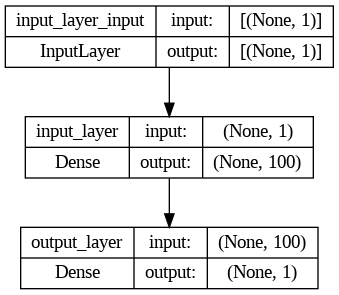

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Visualize model predictions.
y_test vs y_pred


In [42]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[ 78.40806 ],
       [ 83.516174],
       [ 88.62428 ],
       [ 93.73239 ],
       [ 98.840515],
       [103.94862 ],
       [109.05675 ],
       [114.164856],
       [119.27297 ],
       [124.38108 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
# Plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''Plots y_test vs  y_pred'''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

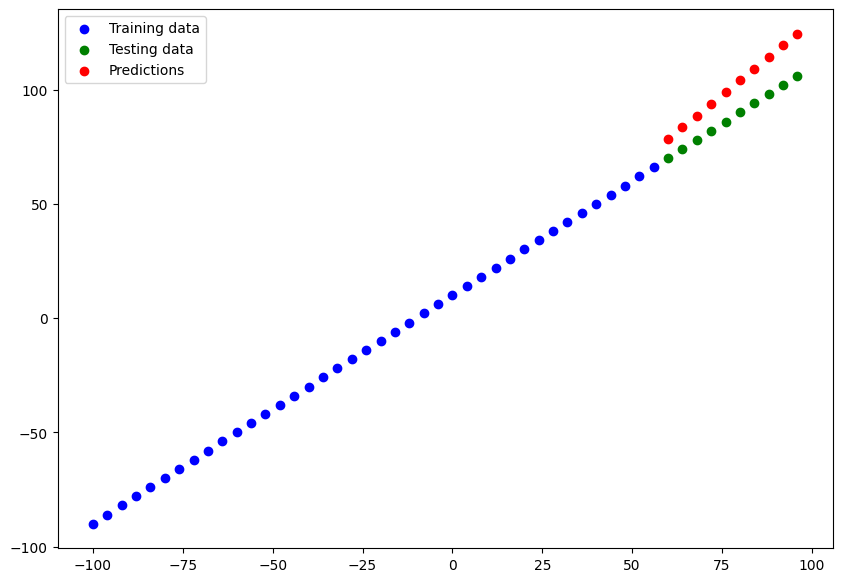

In [45]:
plot_predictions()

### Evaluating model predictions with regression evaluation matrix

Depending on the problem, we will use different evaluation matrix

Two main matrix used with regression:
* MAE- mean absolute error(great starter matrix for a regression problem)
* MSE- Mean Squared Error(When larger errors are more significant than smaller error)
* Huber-Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [46]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 13.3946 - mae: 13.3946


[13.394567489624023, 13.394567489624023]

In [47]:
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.236776, 10.496765, 10.      , 10.746478, 12.904309, 16.358898,
       21.056747, 26.164856, 31.272974, 36.38108 ], dtype=float32)>

In [48]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.236776, 10.496765, 10.      , 10.746478, 12.904309, 16.358898,
       21.056747, 26.164856, 31.272974, 36.38108 ], dtype=float32)>

In [49]:
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.394571>

In [50]:
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=189.54483>

### Running experiments to improve model

1. Get more data
2. Make model larger and more complex
3. Train for longer

3 modelling experiments:

1. `model_1` - 1 layer, 100 epochs.

2. `model_2` - 2 layer, 100 epochs.

3. `model_3` - 2 layers, 500 epochs.

# **Build `model_1`**

In [54]:
# Setting random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 43ms/step - loss: 52.7178 - mae: 52.7178
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 19.1751 - mae: 19.1751
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8163 - mae: 10.8163
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4940 - mae: 9.4940
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3900 - mae: 10.3900
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.6277 - mae: 9.6277
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7370 - mae: 8.7370
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0693 - mae: 9.0693
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.1471 - mae: 19.1471
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3424 - mae: 10.3424
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

1/1 [==============================] - 0s 76ms/step


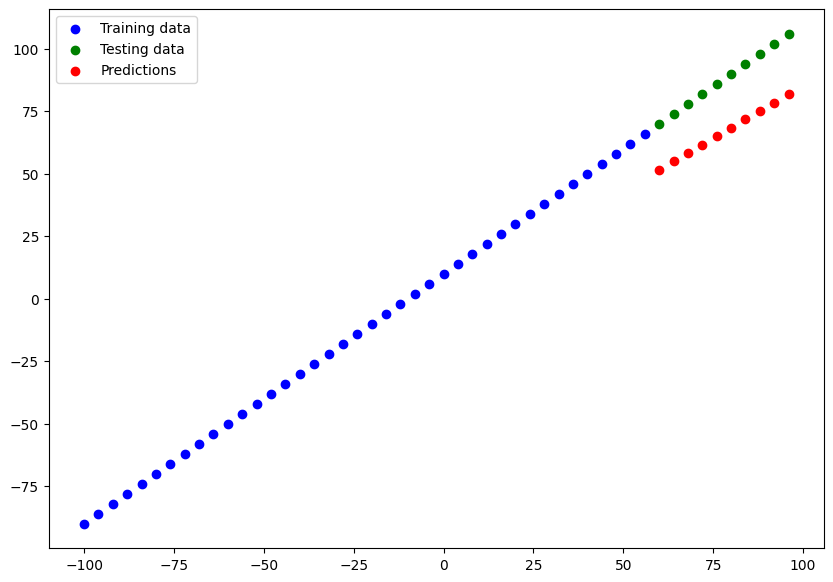

In [55]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [63]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

In [65]:
mae_1=mae(y_test,y_pred_1)
mse_1=mse(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.269928>,
 <tf.Tensor: shape=(), dtype=float32, numpy=455.84027>)

### **Build `model_2`**

In [87]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 25ms/step - loss: 34.6435 - mse: 1704.2242
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 28.5749 - mse: 1056.9720
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 32.5907 - mse: 1627.5172
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 13.5487 - mse: 258.7479
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 18.4046 - mse: 459.1896
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2906 - mse: 129.0821
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3102 - mse: 141.5108
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2569 - mse: 179.6227
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 42.3068 - mse: 2862.0896
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 29.4649 - mse: 1228.9403
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 60ms/step


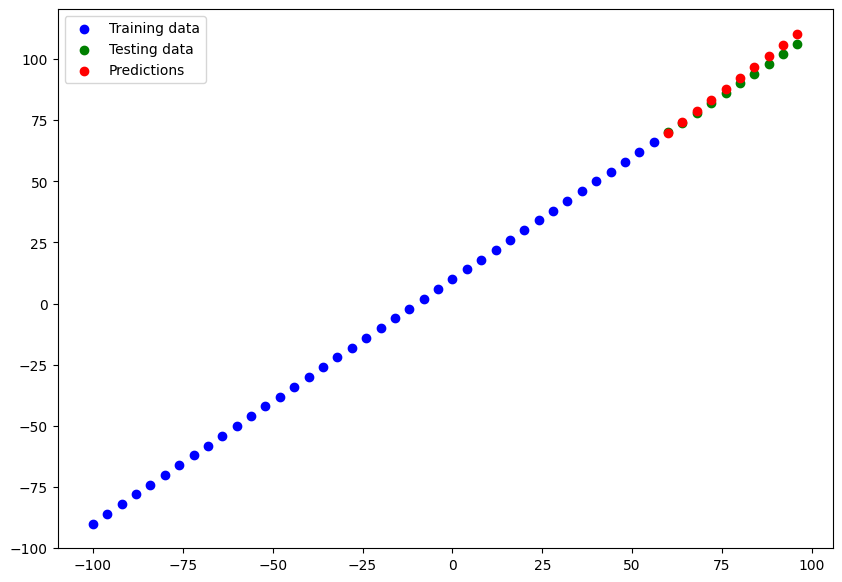

In [88]:
y_pred_2=model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [89]:
# Calculate eval metrics
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)

In [90]:
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.033271>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0814013>)

### **Build `model_3`**

In [74]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 23ms/step - loss: 25.3477 - mse: 1211.9485
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 23.7719 - mse: 799.3497
Epoch 3/500
2/2 [==============================] - 0s 19ms/step - loss: 28.8265 - mse: 1248.3229
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 16.1274 - mse: 371.2234
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 22.5600 - mse: 745.5557
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 10.6332 - mse: 125.7733
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.6354 - mse: 165.6971
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.2824 - mse: 183.7608
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 42.5057 - mse: 2894.0483
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 29.6353 - mse: 1243.9746
Epoch 11/500
2/2 [=====================

1/1 [==============================] - 0s 58ms/step


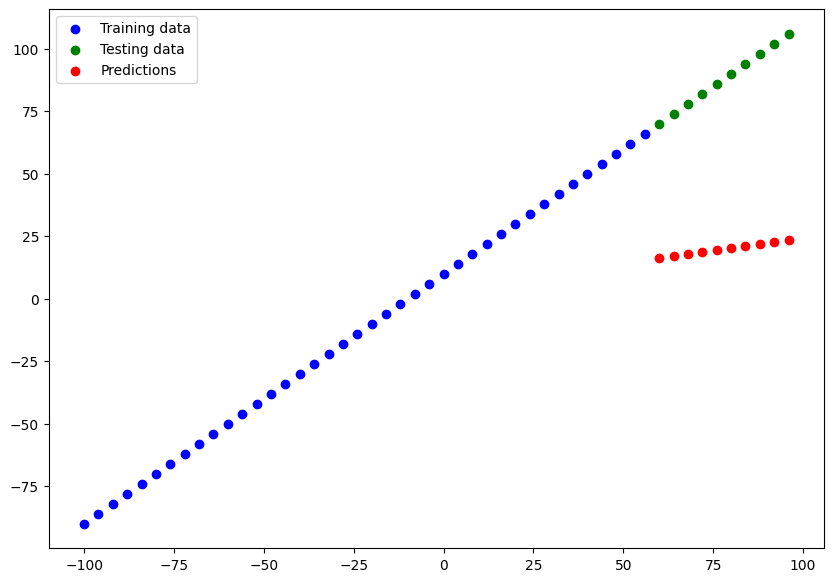

In [75]:
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [76]:
mae_3=mae(y_test,y_pred_3)
mse_3=mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.99162>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4707.503>)

### Comparing results of our experiment
Comparing results of our models


In [91]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["Model","mae","mse"])
all_results

,Model,mae,mse
0,model_1,21.269928,455.840271
1,model_2,2.033271,6.081401
2,model_3,67.991623,4707.502930


`model_2` is best


In [92]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 150)               300       
                                                                 
 dense_22 (Dense)            (None, 1)                 151       
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


## Machine Learning Practitioner's Motto:

> **"Experiment, Experiment and Experiment"**

## Tracking your Experiments.

Tools to keep track of results of our experiments:

* TensorBoard
* Weights & Biases(plugs straight into tensorboard)

### Saving our models
Saving models helps to use them wherever we like

2 formats we can save our models to:

1. SaveModel Format
2. HDF5 format

In [93]:
# SaveModel format

model_2.save("bestRes_course_00")

In [94]:
model_2.save("bestRes_course_00_hdf5.h5")

In [95]:
load_SaveModel_Format = tf.keras.models.load_model("/content/bestRes_course_00")
load_SaveModel_Format.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 150)               300       
                                                                 
 dense_22 (Dense)            (None, 1)                 151       
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_2_preds=model_2.predict(X_test)
load_SaveModel_Format_preds=load_SaveModel_Format.predict(X_test)

1/1 [==============================] - 0s 136ms/step


In [97]:
model_2_preds==load_SaveModel_Format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [98]:
# Load h5 format model
load_h5_Format = tf.keras.models.load_model("/content/bestRes_course_00_hdf5.h5")
load_h5_Format.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 150)               300       
                                                                 
 dense_22 (Dense)            (None, 1)                 151       
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [99]:
load_h5_Format_preds = load_h5_Format.predict(X_test)
model_2_preds == load_h5_Format_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])